Monthly Average Passengers:
Month
1     15.664329
2     14.466280
3     15.741015
4     19.470926
5     17.013415
6     20.875983
7     27.301094
8     23.503134
9     19.226331
10    18.132572
11    17.986111
12    19.407775
Name: Number, dtype: float64


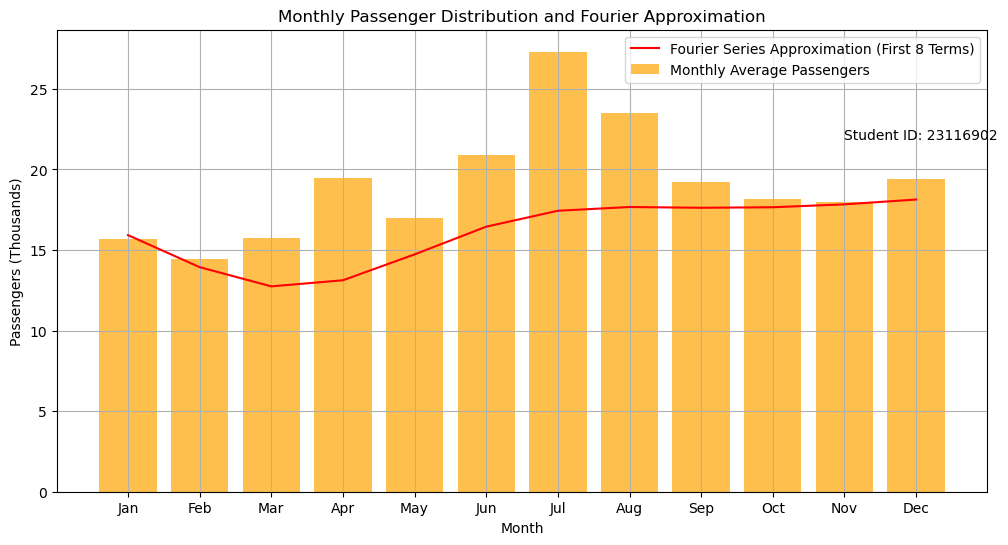

C:\Users\shivani guduru\AppData\Local\Temp\ipykernel_7544\1685037039.py:71: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


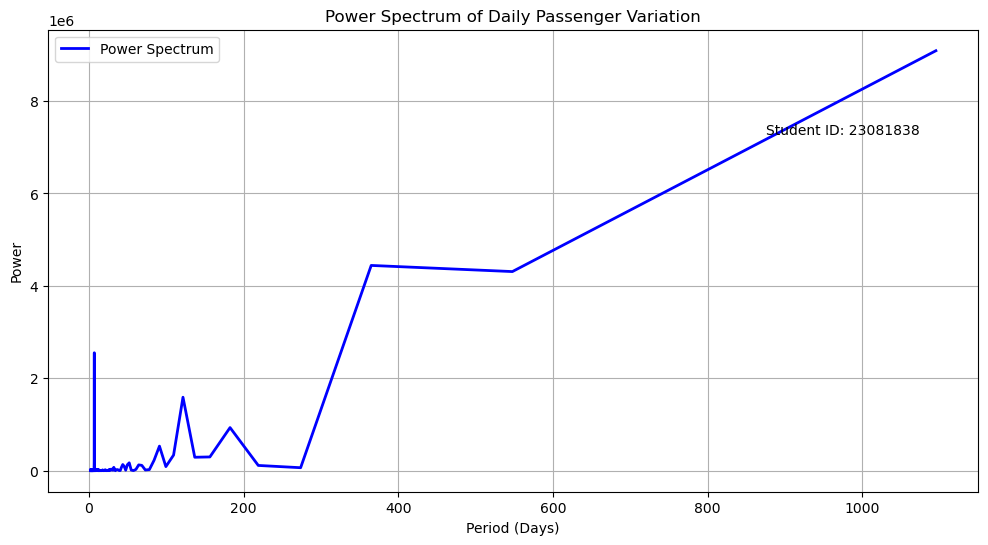

X (Period of max contribution): 1095.00 days
Y (Max Power): 9087685.18


In [3]:
# -*- coding: utf-8 -*-
"""Airline_3_(MAIN)_1.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/16NIRCJx3tX5f9r2HE4Kk3B-0VN9VVWzQ
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft

data = pd.read_csv("airline3.csv")
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

"""##daily passenger numbers"""

daily_passengers = data['Number'].values
time = np.arange(len(daily_passengers))

"""## Perform Fourier transform of the daily passenger number variation with time"""

passenger_fft = fft(daily_passengers)
n = len(passenger_fft)
frequencies = np.fft.fftfreq(n, d=1)

"""##Derive distribution of average daily passengers per month"""

monthly_avg_passengers = data.groupby('Month')['Number'].mean()

""" Monthly averages to verify correctness"""

print("Monthly Average Passengers:")
print(monthly_avg_passengers)

"""Prepare Fourier series approximation using the first eight terms"""

fourier_series = np.zeros(len(time))
for k in range(8):
    amplitude = np.abs(passenger_fft[k]) / n
    phase = np.angle(passenger_fft[k])
    frequency = frequencies[k]
    fourier_series += amplitude * np.cos(2 * np.pi * frequency * time + phase)

"""(C) and (D) Plot the bar chart and Fourier series on the same figure (Figure 1)"""

plt.figure(figsize=(12, 6))
plt.bar(monthly_avg_passengers.index, monthly_avg_passengers.values, label="Monthly Average Passengers", alpha=0.7, color='orange')

# Resample Fourier series to monthly values
monthly_fourier = [fourier_series[i * 30] for i in range(12)]  # Approx. middle of each month

plt.plot(monthly_avg_passengers.index, monthly_fourier, color="red", label="Fourier Series Approximation (First 8 Terms)")
plt.xlabel("Month")
plt.ylabel("Passengers (Thousands)")
plt.title("Monthly Passenger Distribution and Fourier Approximation")
plt.xticks(ticks=np.arange(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid()
plt.text(11, max(monthly_avg_passengers) * 0.8, "Student ID: 23116902")
plt.savefig("figure1.png")
plt.show()

""" Calculate power spectrum and plot as Figure 2"""

power_spectrum = np.abs(passenger_fft)**2
periods = 1 / frequencies
valid_periods = periods[1:n//2]
valid_power = power_spectrum[1:n//2]
valid_periods = valid_periods[valid_periods > 0]
valid_power = valid_power[:len(valid_periods)]

plt.figure(figsize=(12, 6))
plt.plot(valid_periods, valid_power, label="Power Spectrum", color="blue", linestyle='-', linewidth=2)
plt.xlabel("Period (Days)")
plt.ylabel("Power")
plt.title("Power Spectrum of Daily Passenger Variation")
plt.legend()
plt.grid()
plt.text(max(valid_periods) * 0.8, max(valid_power) * 0.8, "Student ID: 23081838")
plt.savefig("figure2.png")
plt.show()

""" Calculate values X and Y"""

X = valid_periods[np.argmax(valid_power)]
Y = max(valid_power)
print(f"X (Period of max contribution): {X:.2f} days")
print(f"Y (Max Power): {Y:.2f}")